<h1>Object Oriented Programming</h1>

Object-oriented programming (OOP) is a programming paradigm based on the concept of "objects" or classes as they are called in Python. These may contain data, in the form of fields, often known as attributes; and code, in the form of procedures, often known as methods. A feature of objects is that an object's procedures (methods) can access and often modify the data fields (attributes) of the object with which they are associated (objects have a notion of "this" or "self"). In OOP, computer programs are designed by building them out of objects that interact with one another. You can find more information that is easy to understand here: https://realpython.com/python3-object-oriented-programming/#what-is-object-oriented-programming-oop

Historically, a program has been viewed as a logical procedure that takes input data, processes it, and produces output data. The programming challenge was how to write the logic, not how to define the data.

Object-oriented programming takes the view that what we really care about are the objects that we want to manipulate rather than the logic required to manipulate them. Examples of objects range from human beings (described by name, address, and so forth) to buildings and floors (whose properties can be described and managed) down to the little widgets on a computer desktop (such as buttons and scroll bars).

The first step in OOP is to identify all the objects the programmer wants to manipulate and how they relate to each other, an exercise known as data modeling. Once an object has been identified, it is generalized in a class of objects (think of Plato's concept of the "idea" chair that stands for all chairs) which defines the kind of data it contains and any logic sequences that may manipulate it. Each distinct logic sequence is known as a method. Objects communicate with well-defined interfaces called messages.

In [2]:
# Installs some basic functions
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h3> Exercise 1: Object Oriented Programming</h3>

In the cell below, a CLASS Polynomial is created. This class contains all polynomial functions. These may be characterized by the attributes coefficientList and degree. An instance of this object can be called by

    mypolynomial = Polynomial(.....)

The $__init__$ method is automatically called when we initialize an instance of the object. Therefore you need to provide the arguments the $__init__$ method requests between brackets. In this case a list of coefficients needs to be provided: [$a$, $b$, $c$, $d$, $e$, etc.] creating a specific polynomial function $a+bx+cx^2+dx^3+ex^4$, etc. From this list the $__init__$ method calculates the degree of the polynomial function.

Classes have methods (functions within the class) that work the same as functions outside a class, except in how to call them and how they handle returns. Two of such methods have been given as well.

You can simply create the CLASS Polynomial by running the following code, but try to figure out what the code does exactly.

In [3]:
class Polynomial():
    """Polynomial(coefficientsList) is a class containing all possible polynomial functions."""
    
    def __init__(self, coefficientList):
        """Initialize a polynomial function using a coefficientlist"""
        self.coefficientList = coefficientList
        self.degree=len(coefficientList)-1
        
    def giveYValue(self, x):
        """Returns y value for a given x value"""
        y=0
        for n in range(len(self.coefficientList)):
            y += self.coefficientList[n]*(x**n)
        return y
        
    def setCoefficient(self, number, value):
        """Changes a specific coefficient of the polynomial function. Call using (number, value)"""
        while len(self.coefficientList) < number:
            self.coefficientList.append(0)
            self.coefficientList[number] = value
    
    def getDegree(self):
        return len(self.coefficientList) - 1
    
    def getCoefficient(self, n):
        return self.coefficientList[n]

<h4>1.1 To do: your first task is to make the statements in the cell below print the degree and coefficients of the object built above.</h4>

To do so you will need to add a method above for each of the two characteristics you want to print. Test those methods properly.

In [4]:
myFirstPolynomial = Polynomial([4,7,2,9])
mySecondPolynomial = Polynomial([-2,3,-10])

degree=myFirstPolynomial.getDegree()
coefficient3=myFirstPolynomial.getCoefficient(3)

print(degree)
print(coefficient3)

degree=mySecondPolynomial.getDegree()
coefficient3=mySecondPolynomial.getCoefficient(2)

print(degree)
print(coefficient3)

3
9
2
-10


<h4>Childs and subclasses</h4>

Below, we have built a new class, which is a so called child of the class Polynomial. This is the class Linear. As you know, a linear function is a special case of a polynomial function. It has a degree of 1 and only two coefficients. Therefore, we do not call the function with a list of coefficients, but rather with only two separate constants $a$ and $b$. Recall that the Polynomial class was called using a list. Since Linear is a child of Polynomial, we need to call Polynomial somehow to get those connections right. This happens in the second line of code of the $__init__$ method, where to that purpose the super() statement is used. After this, we can use attribute names of the parent class in our child class as well.

<h4>1.2 To do: your second task is to try (for example) to print self.degree without defining it first.</h4>

You will see that this uses the .degree attribute from Polynomial.

In [5]:
class Linear(Polynomial):
    """Linear will be a subclass of Polynomial."""
    
    def __init__(self, a,b):
        """Initializes a linear function using (a, b). 
        Init needs to call the class Polynomial using a list [a,b]."""
        self.coefficientList=[a,b]
        # Here we initialize the class Polynomial with the correct coefficients.
        super().__init__(self.coefficientList)
        # Try now to print self.degree
        
    
    def setCoefficient(self, number, value):
        """Ädds a check on the linear function"""
        if number > 1:
            raise ValueError("Only first order polynomial")
        super().setCoefficient(number,value)  
        
        

myFirstPolynomial = Polynomial([4,7,2,9])
mySecondPolynomial = Polynomial([-2,3,-10])

myFirstLinear = Linear(3,2)

print(myFirstLinear.getDegree())

1


<h4>1.3 To do: your third task is to make the following cell plot the three objects that we have built (myFirstPolynomial, mySecondPolynomial, myFirstLinear).</h4>

Look carefully at the various methods inside the parent class.

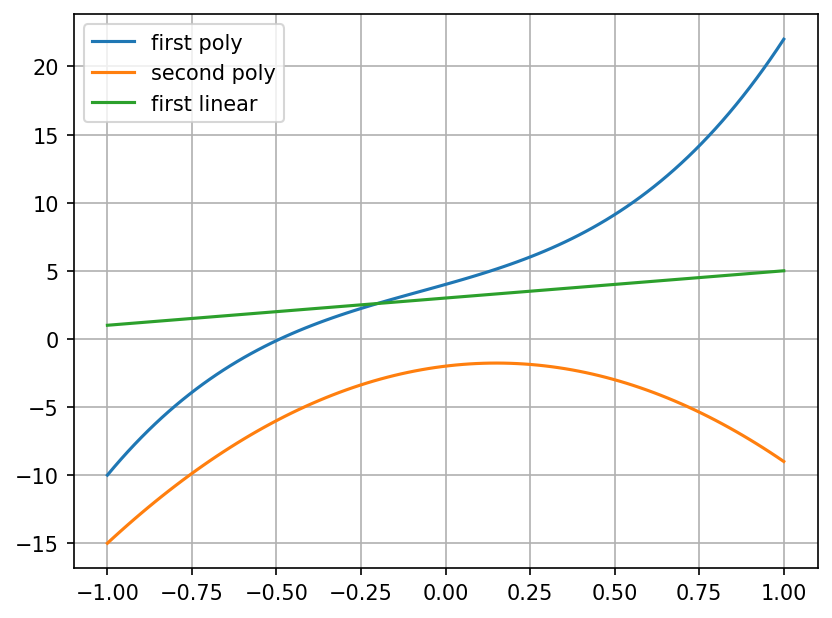

In [9]:
# Define an x range
import numpy as np
x_range = np.linspace(-1, 1, 100)

# Request y values
y_first_poly = myFirstPolynomial.giveYValue(x_range)
y_second_poly = mySecondPolynomial.giveYValue(x_range)
y_first_linear = myFirstLinear.giveYValue(x_range)

# Plot
fig, ax = plt.subplots(dpi=150)

ax.plot(x_range, y_first_poly, label='first poly')
ax.plot(x_range, y_second_poly, label='second poly')
ax.plot(x_range, y_first_linear, label='first linear')

ax.grid()
ax.legend()
